In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/tmp/ipykernel_295822/347984750.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# FastTrack

In [5]:
data = pd.read_csv("last_100_frames/Tracking_Result/tracking.txt", sep='\t')


data

,xHead,yHead,tHead,xTail,yTail,tTail,xBody,yBody,tBody,curvature,...,headMinorAxisLength,headExcentricity,tailMajorAxisLength,tailMinorAxisLength,tailExcentricity,bodyMajorAxisLength,bodyMinorAxisLength,bodyExcentricity,imageNumber,id
0,261.96000,280.7210,3.776520,268.60900,276.2500,3.752090,265.66100,278.2320,3.736700,0.000038,...,2.11757,0.865722,5.62314,2.09320,0.928133,9.36522,1.93892,0.978334,0,0
1,5.09839,280.7630,3.105230,11.97250,276.8910,4.049730,8.94000,278.6000,3.679700,0.003459,...,4.07643,0.495744,5.51169,4.13233,0.661734,9.23939,4.24021,0.888474,0,1
2,76.91920,280.7870,5.774690,72.16900,272.0350,5.286860,75.03190,277.3300,5.253640,0.016176,...,4.68829,0.630318,6.89683,3.04915,0.896961,11.51970,4.31303,0.927265,0,2
3,115.24400,257.8850,3.085920,126.98600,257.7590,3.193890,121.11800,257.8240,3.151940,0.000320,...,1.78619,0.945418,6.91832,1.58929,0.973256,13.25920,1.40515,0.994369,0,3
4,88.25330,257.2760,6.116940,75.93470,251.9440,5.722350,83.43480,255.2030,5.853690,0.005389,...,6.60317,0.349070,10.02540,3.69397,0.929643,15.47560,5.66616,0.930562,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,303.50000,17.9612,2.461900,309.02800,22.8465,2.448380,306.67400,20.7442,2.423400,0.000040,...,1.85132,0.858637,5.06925,1.81244,0.933899,8.54340,1.64212,0.981354,99,86
5720,12.42020,82.6895,0.018243,4.78944,83.4499,0.251895,9.31111,83.0000,0.095671,0.033460,...,1.93338,0.924682,3.90459,1.74992,0.893948,8.76977,1.74913,0.979908,99,87
5721,16.01780,25.4766,2.587990,26.04550,36.9168,1.715820,20.95950,31.1214,2.211810,0.047096,...,4.55483,0.852831,12.49360,4.58258,0.930301,18.04740,6.35790,0.935891,99,88
5722,38.51990,35.4190,6.202280,32.08050,34.9932,0.013740,35.80950,35.2381,6.220820,0.000249,...,2.19337,0.827853,3.48507,1.79212,0.857653,7.33245,1.84040,0.967989,99,89


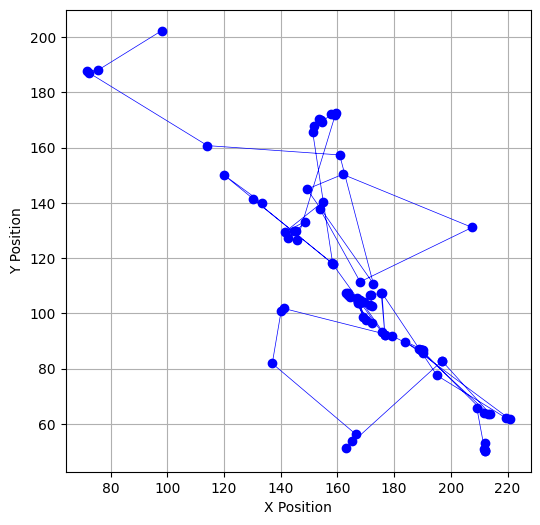

In [13]:
particle_positions = data[data['id'] == 44].sort_values('imageNumber')
X_tm,Y_tm = particle_positions['xBody'],particle_positions['yBody']
# X_tm,Y_tm = NormalizeData(X_tm),NormalizeData(Y_tm)
scale=1
# Step 3: Plot the trajectory
plt.figure(figsize=(6, 6))
plt.plot(X_tm, Y_tm, marker='o', linestyle='-',  lw=0.5,color='b')
# plt.plot(X, Y, marker='o', linestyle='-',  lw=0.5,color='red', label=f'trackmate tracking id {trackmid}')
plt.plot()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
# plt.legend()
plt.show()

# Trackpy

## Without rod-shaped assistance

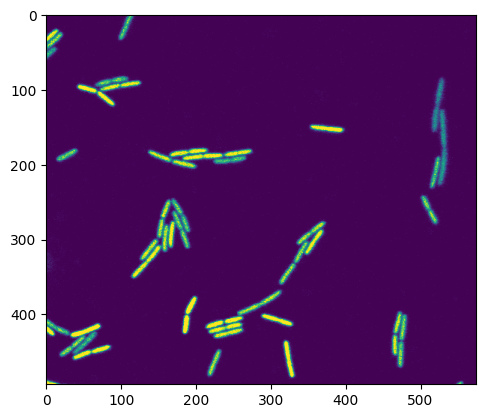

In [147]:
import trackpy as tp
import pims

@pims.pipeline
def gray(image):
    return image[:, :, 0]

# frames = gray(pims.open('last_100_frames/*.png'))
# frames = gray(pims.open('/home/janne/bacteria/data/55_tracks/original_movie_frames/*.tif'))
frames = pims.open('/home/janne/bacteria/data/55_tracks/original_movie_frames/*.tif')
plt.imshow(frames[0])


# # Locate features in each frame
# f = tp.batch(frames, diameter=11, minmass=100, invert=False)

# # # Link features into trajectories
# t = tp.link_df(f, search_range=5)

# # # Filter trajectories
# t1 = tp.filter_stubs(t, 20)

# # # Plot trajectories
# tp.plot_traj(t1)
# plt.show()

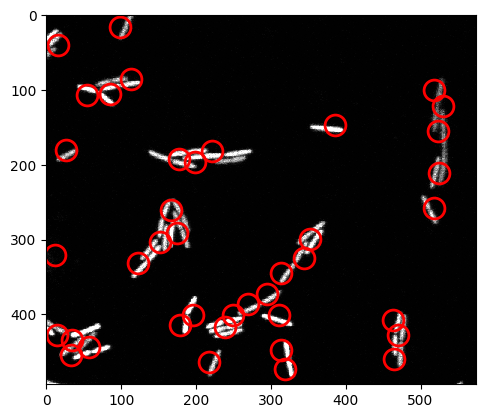

<Axes: >

In [148]:
f = tp.locate(frames[0], 17, invert=True,minmass=2000)
tp.annotate(f,frames[0])
# f.head()

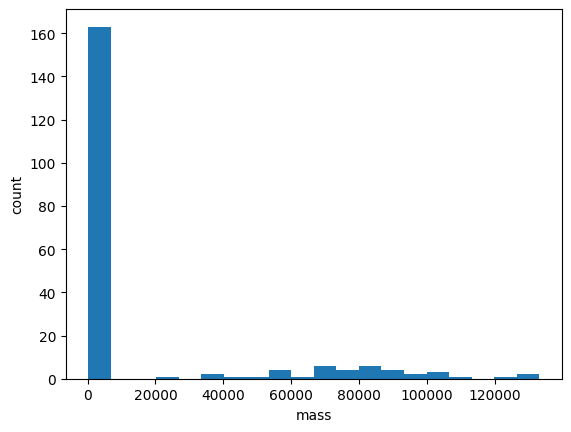

In [95]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

/home/janne/.local/lib/python3.10/site-packages/trackpy/plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

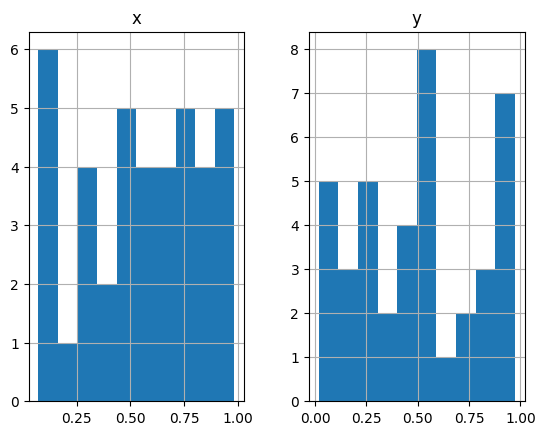

In [97]:
tp.subpx_bias(f)

In [151]:
f = tp.batch(frames, 17, invert=True,minmass=2000)
f

Frame 149: 71 features


,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,15.891398,98.551891,53399.490358,4.798482,0.441267,710.209946,12756741.0,-0.000930,0
1,40.572191,15.318353,67439.456237,4.525123,0.216192,1005.850046,12726908.0,-0.000744,0
2,85.045422,113.494996,76932.352948,4.459256,0.204882,1272.238928,12721101.0,-0.000717,0
3,99.959564,518.087167,35061.932797,4.728757,0.415944,481.356117,12809534.0,-0.001665,0
4,106.532353,53.852273,80511.863323,4.717167,0.461271,1166.336458,12682777.0,-0.000575,0
...,...,...,...,...,...,...,...,...,...
8014,442.829148,411.991023,55592.964196,4.782549,0.417092,729.329124,12759826.0,NaN,149
8015,450.079282,378.304793,81400.897310,4.692815,0.496917,1178.902467,12714916.0,NaN,149
8016,452.153852,287.566963,82885.828496,4.375125,0.123284,1391.062823,12684439.0,NaN,149
8017,458.971523,459.127425,58473.007554,4.875118,0.413135,744.187363,12764734.0,NaN,149


In [152]:
t = tp.link(f, 10, memory=3)
t.head()
t['particle'].nunique()

Frame 149: 71 trajectories present.


1181

In [108]:
t1 = tp.filter_stubs(t, 10)
t1['particle'].nunique()

226

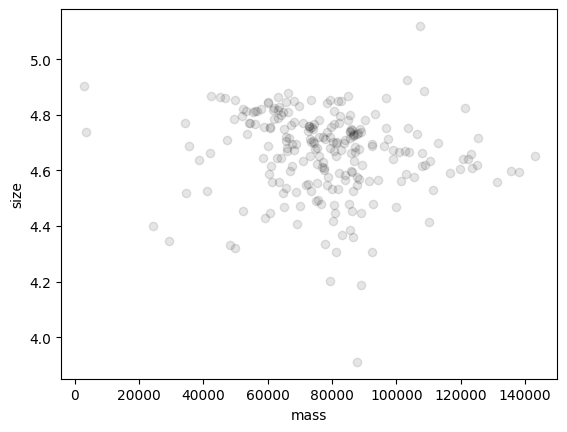

In [153]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

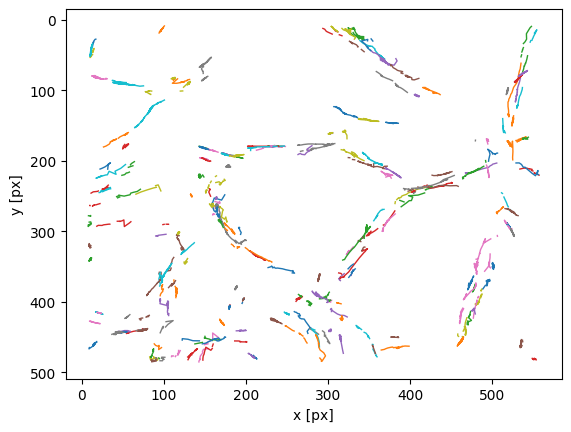

In [154]:
plt.figure()
tp.plot_traj(t1);

## Rod-shaped assistance 

In [256]:
path = '/home/janne/bacteria/data/55_tracks/original_movie_frames/binary/Results.csv'
results_imagej = pd.read_csv(path)
df = results_imagej
# results_imagej

# import os
# filename = path.split(os.sep)[-1].rstrip('.csv')
# print(f'Processing {path}')
import re
def extract_number(label):
    match = re.search(r't:(\d+)/200', label)
    if match:
        return match.group(1)
    return label 


df['Label'] = df['Label'].apply(extract_number)
# df = df.drop(0)
df1 = df.drop(df.columns[0], axis=1)
df = df1.drop(0)
# df = df.drop(1, axis=1)
df

,Label,Area,X,Y,XM,YM
1,1,0.011,54.642,16.738,54.642,16.738
2,1,0.011,54.642,17.047,54.642,17.047
3,1,0.011,54.745,20.343,54.745,20.343
4,1,0.011,53.921,20.755,53.921,20.755
5,1,0.021,54.384,22.145,54.384,22.145
...,...,...,...,...,...,...
3012,150,0.021,17.716,43.260,17.716,43.260
3013,150,0.021,18.025,43.466,18.025,43.466
3014,150,0.011,18.386,43.827,18.386,43.827
3015,150,0.021,55.002,48.513,55.002,48.513


In [257]:
# df.drop(labels=['Label'], inplace=True, axis=1)
df.rename({'X': 'x', 'Y': 'y','Label':'frame'}, axis=1, inplace=True)
df

,frame,Area,x,y,XM,YM
1,1,0.011,54.642,16.738,54.642,16.738
2,1,0.011,54.642,17.047,54.642,17.047
3,1,0.011,54.745,20.343,54.745,20.343
4,1,0.011,53.921,20.755,53.921,20.755
5,1,0.021,54.384,22.145,54.384,22.145
...,...,...,...,...,...,...
3012,150,0.021,17.716,43.260,17.716,43.260
3013,150,0.021,18.025,43.466,18.025,43.466
3014,150,0.011,18.386,43.827,18.386,43.827
3015,150,0.021,55.002,48.513,55.002,48.513


In [200]:
df

,frame,Area,x,y,XM,YM
1,1,0.011,54.642,16.738,54.642,16.738
2,1,0.011,54.642,17.047,54.642,17.047
3,1,0.011,54.745,20.343,54.745,20.343
4,1,0.011,53.921,20.755,53.921,20.755
5,1,0.021,54.384,22.145,54.384,22.145
...,...,...,...,...,...,...
3012,150,0.021,17.716,43.260,17.716,43.260
3013,150,0.021,18.025,43.466,18.025,43.466
3014,150,0.011,18.386,43.827,18.386,43.827
3015,150,0.021,55.002,48.513,55.002,48.513


In [274]:
tp.quiet()  # supress output, makes linking quicker
search = round(12/0.2/9)
t = tp.link_df(df, search_range=0.94,memory=50)
t

,frame,Area,x,y,XM,YM,particle
1,1,0.011,54.642,16.738,54.642,16.738,0
13,1,0.011,5.614,44.960,5.614,44.960,1
12,1,0.350,24.899,43.502,24.899,43.502,2
10,1,0.552,24.411,42.781,24.411,42.781,3
9,1,0.064,48.874,42.230,48.874,42.230,4
...,...,...,...,...,...,...,...
2988,150,0.021,31.209,0.206,31.209,0.206,332
2987,150,2839.881,29.935,25.387,29.935,25.387,24
3015,150,0.021,55.002,48.513,55.002,48.513,232
3000,150,0.032,8.704,24.051,8.704,24.051,498


In [275]:
t1 = tp.filter_stubs(t,2)
t1

,frame,Area,x,y,XM,YM,particle
frame,,,,,,,
1,1,0.011,54.642,16.738,54.642,16.738,0
1,1,0.011,5.614,44.960,5.614,44.960,1
1,1,0.552,24.411,42.781,24.411,42.781,3
1,1,0.064,48.874,42.230,48.874,42.230,4
1,1,0.074,48.962,41.781,48.962,41.781,5
...,...,...,...,...,...,...,...
150,150,0.021,31.209,0.206,31.209,0.206,332
150,150,2839.881,29.935,25.387,29.935,25.387,24
150,150,0.021,55.002,48.513,55.002,48.513,232


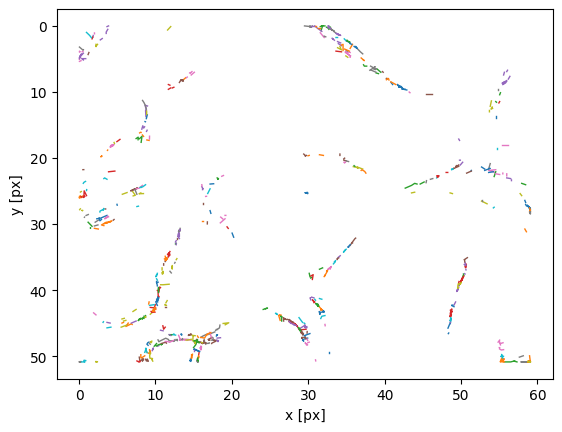

In [276]:
plt.figure()
tp.plot_traj(t1);